In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from joblib import dump
import joblib
warnings.filterwarnings('ignore')

# **Imported all libraries and now importing the dataset from the web using its url and now as it is not having the header row attached, we are adding header rows then loading it in a dataframe**


In [5]:
# GitHub raw file URL
url = 'https://raw.githubusercontent.com/josephboban2000/AIML_JOSEPH_INFY/main/breast%20cancer.csv'

# Load the data directly from the URL
data = pd.read_csv(url)

# Show the first few rows
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

# checking the first five rows

In [7]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


# checking the last 10 rows

In [7]:
data.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


# checking the shape, to know the number of rows and Columns

In [9]:
data.shape

(569, 33)

# Checking the distribution of Benign and Malignant

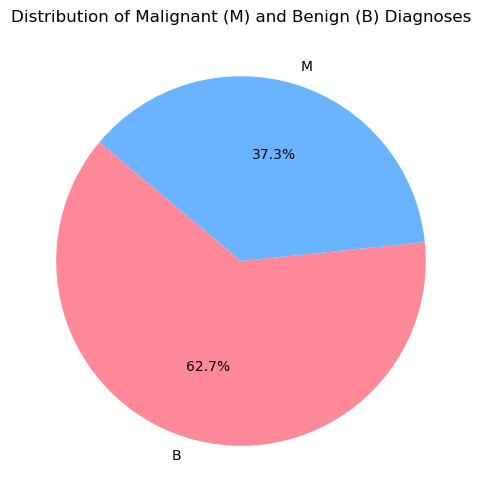

In [11]:
# Count the occurrences of 'M' and 'B' in the 'Diagnosis' column
diagnosis_counts = data['diagnosis'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF8999', '#69B3FF'])
plt.title("Distribution of Malignant (M) and Benign (B) Diagnoses")
plt.show()

### There is data imbalance , therefore Smote is needed

# checking the Info of each variables 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### all are numerical except the diagnosis, which is a string

### Droping the ID, and Unnamed column as it makes no sence 

In [17]:
data.drop(['id','Unnamed: 32'], inplace=True, axis=1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# 5 point Summary of the Data

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# Currently not doing the outlier smoothing owing to the fact that this is medical data and without having the domain expertice, it is a bad practice to remove or smooth outliers
### despite this,  it should be better to have an idea regarding its percentage

In [22]:
# Replace 'age' with the desired column name
def outlier_test(column_name,data_frame):
    # Calculate the IQR (Interquartile Range)
    Q1 = data_frame[column_name].quantile(0.25)
    Q3 = data_frame[column_name].quantile(0.75)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
 
    # Identify outliers
    outliers = data_frame[(data[column_name] < lower_bound) | (data_frame[column_name] > upper_bound)]
 
    # Get the number of outliers
    num_outliers = len(outliers)
    percentage_of_outliers= num_outliers/data_frame[column_name].count()
 
    # Display the number of outliers for the specified column
    print(f"Number of outliers for '{column_name}': {num_outliers}  Percentage of Outliers: {percentage_of_outliers:.2f}%")
for i in data.select_dtypes(include=['float64', 'int64']).columns:
    outlier_test(i,data)

Number of outliers for 'radius_mean': 14  Percentage of Outliers: 0.02%
Number of outliers for 'texture_mean': 7  Percentage of Outliers: 0.01%
Number of outliers for 'perimeter_mean': 13  Percentage of Outliers: 0.02%
Number of outliers for 'area_mean': 25  Percentage of Outliers: 0.04%
Number of outliers for 'smoothness_mean': 6  Percentage of Outliers: 0.01%
Number of outliers for 'compactness_mean': 16  Percentage of Outliers: 0.03%
Number of outliers for 'concavity_mean': 18  Percentage of Outliers: 0.03%
Number of outliers for 'concave points_mean': 10  Percentage of Outliers: 0.02%
Number of outliers for 'symmetry_mean': 15  Percentage of Outliers: 0.03%
Number of outliers for 'fractal_dimension_mean': 15  Percentage of Outliers: 0.03%
Number of outliers for 'radius_se': 38  Percentage of Outliers: 0.07%
Number of outliers for 'texture_se': 20  Percentage of Outliers: 0.04%
Number of outliers for 'perimeter_se': 38  Percentage of Outliers: 0.07%
Number of outliers for 'area_se':

## Created a function so that the distribution of each columns could be found in a single go


In [24]:
def histplot_test(val):
    sns.histplot(data[val],bins=10,kde=True)
    plt.xlabel("value")
    plt.ylabel("Freequency")
    plt.title(f"histogram of {val}")
    plt.show()

### Passing the names of all the columns as string

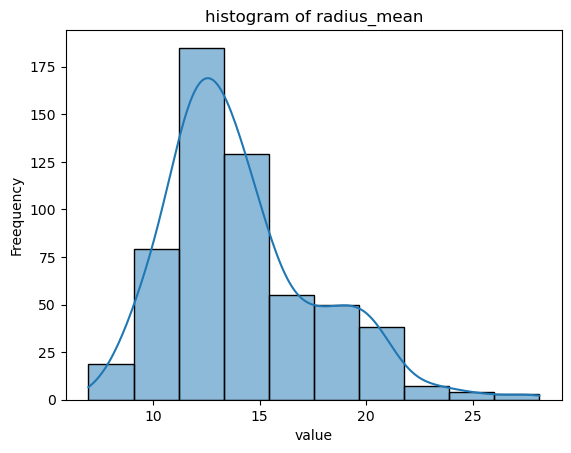

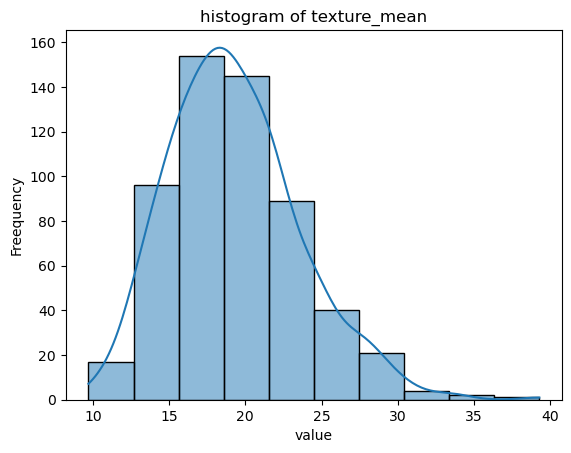

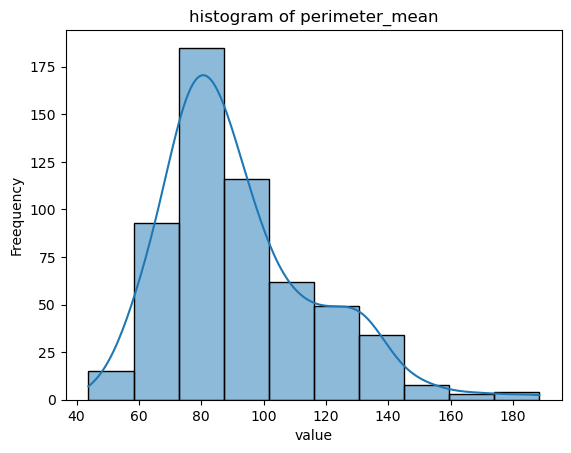

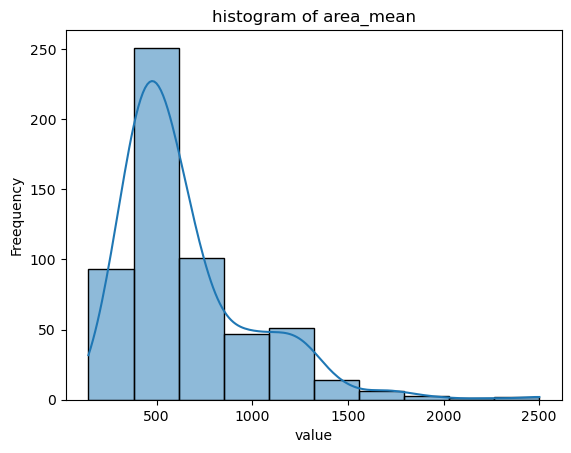

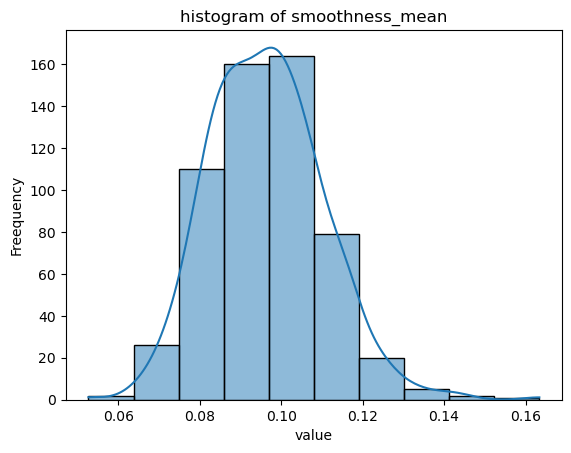

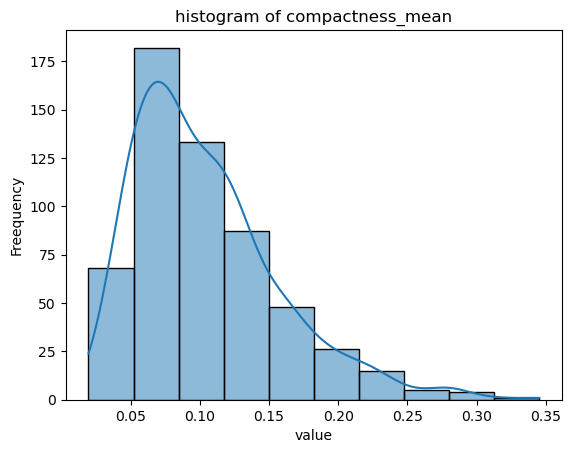

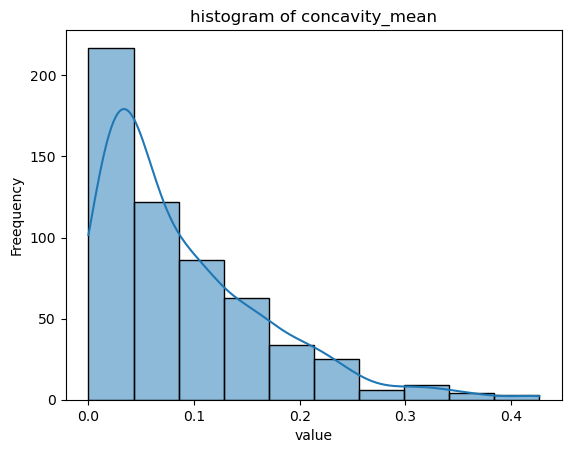

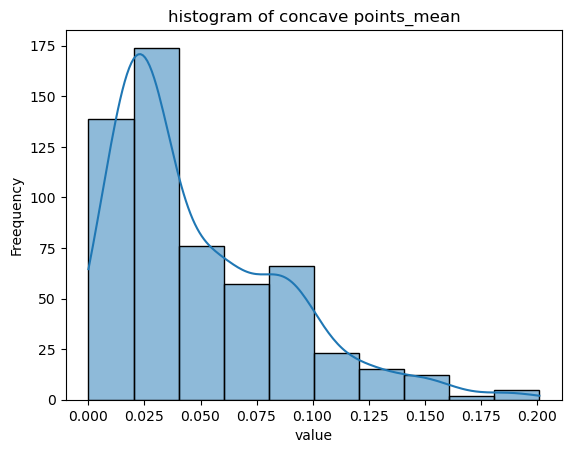

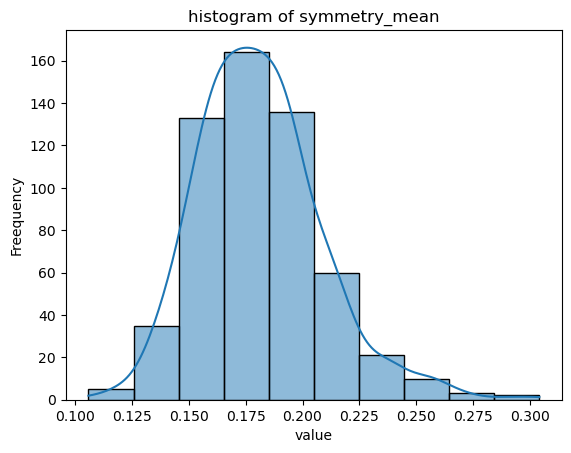

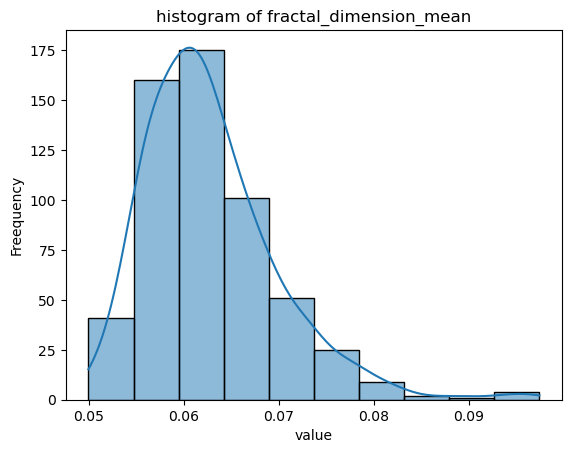

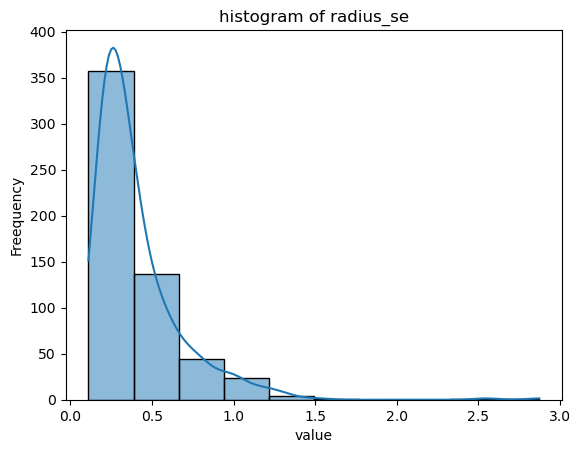

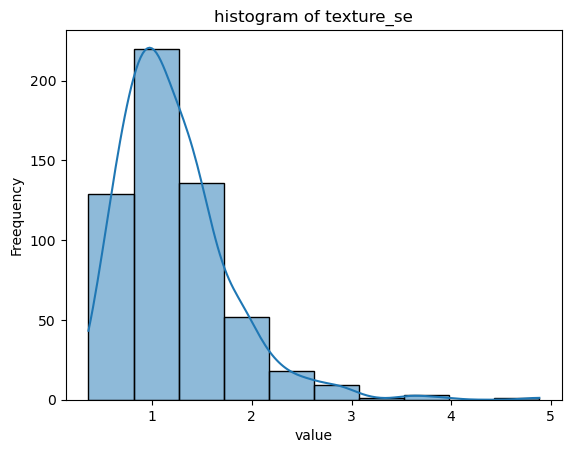

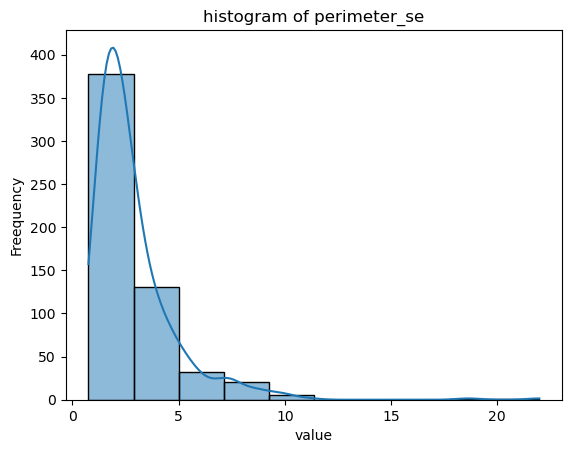

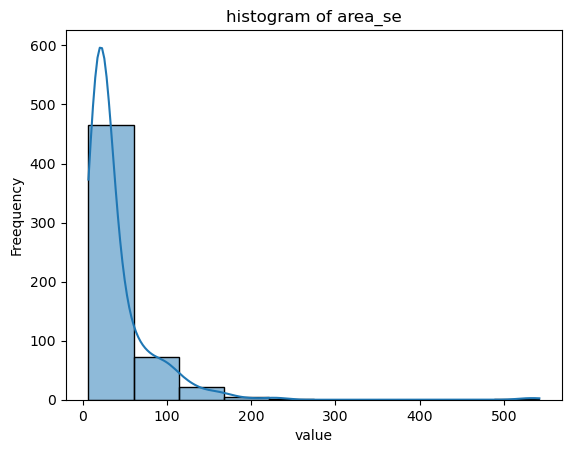

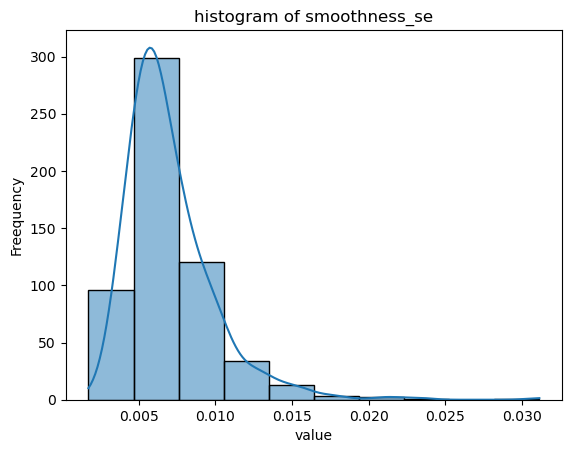

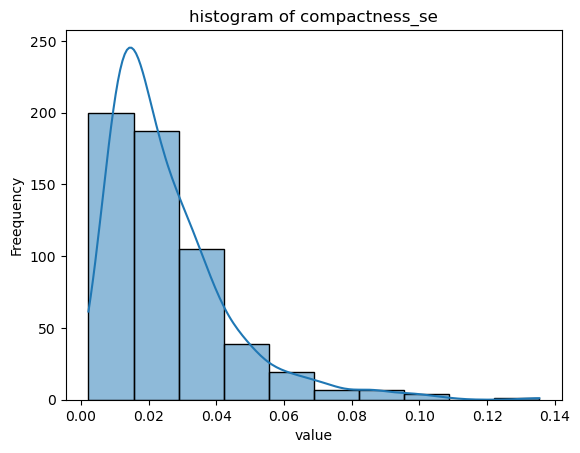

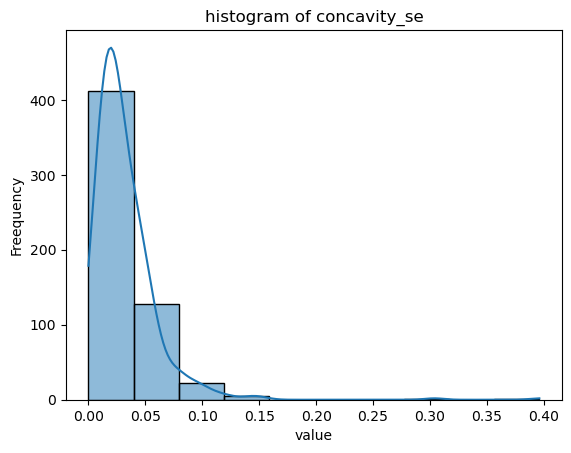

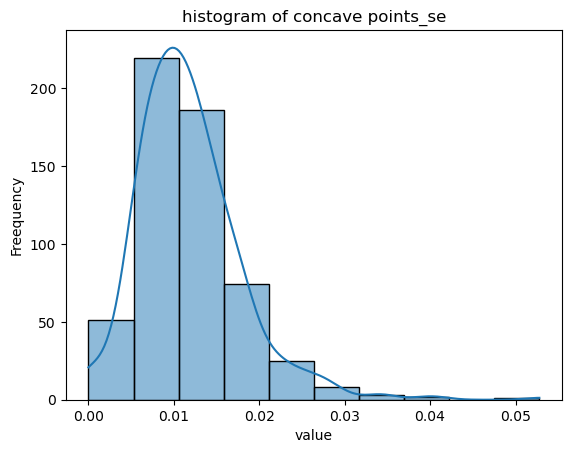

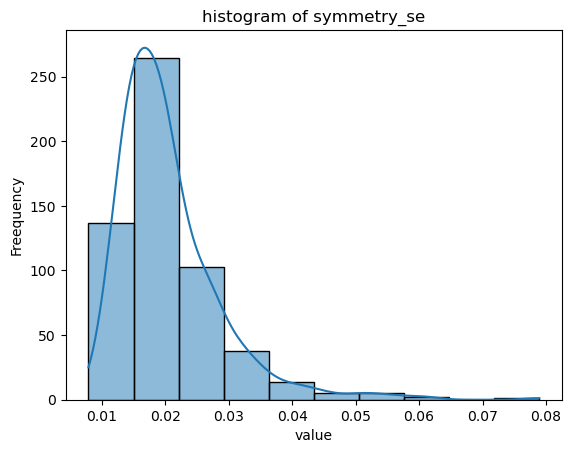

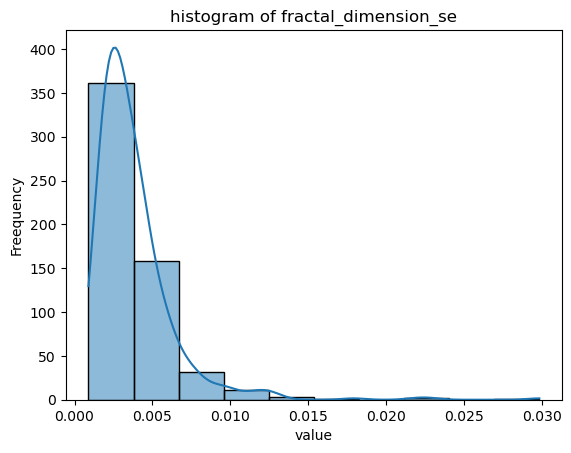

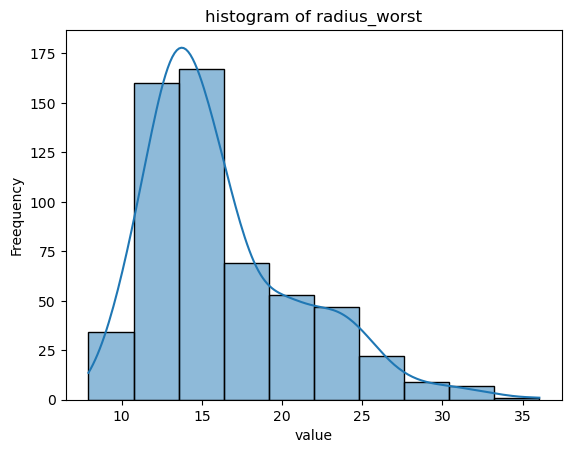

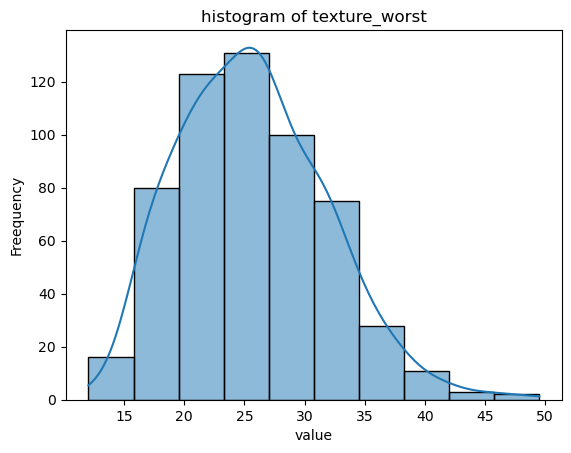

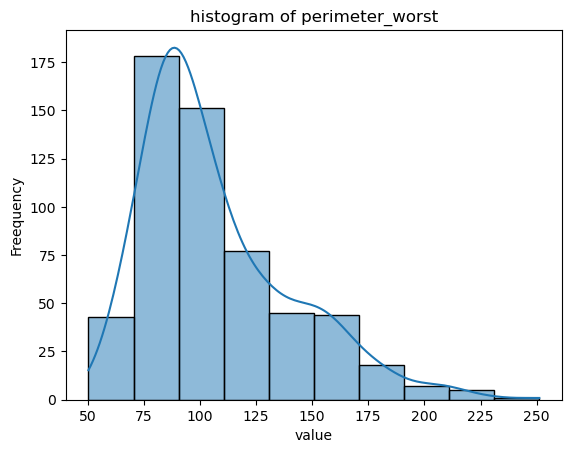

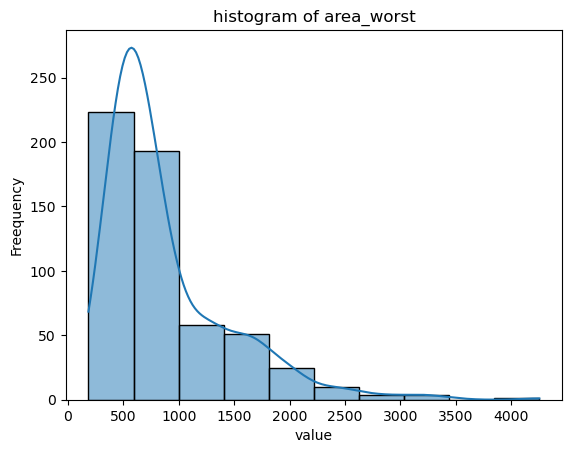

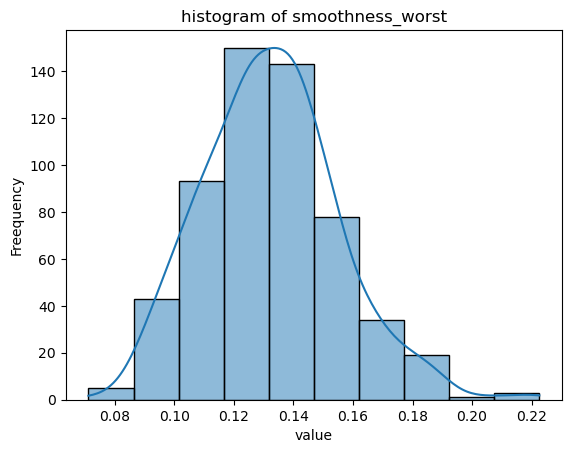

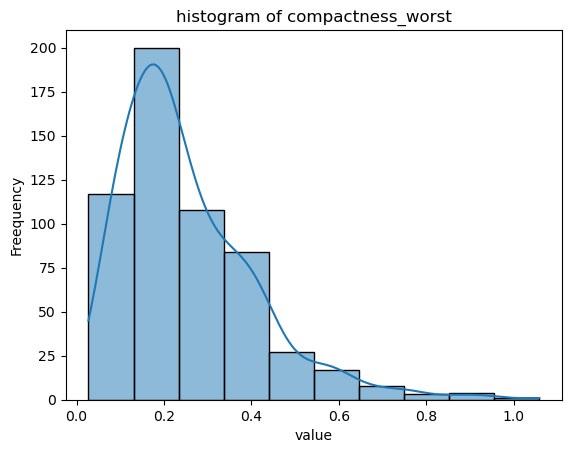

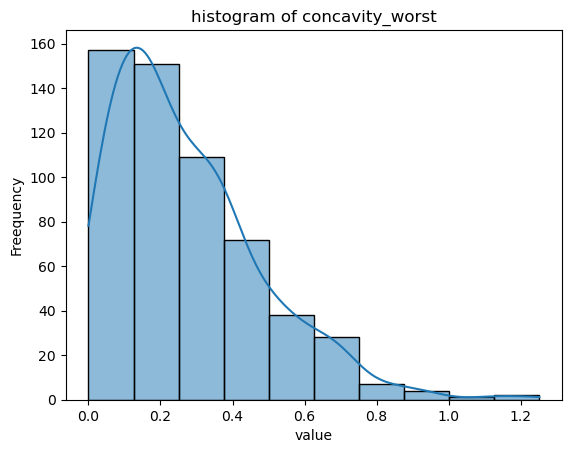

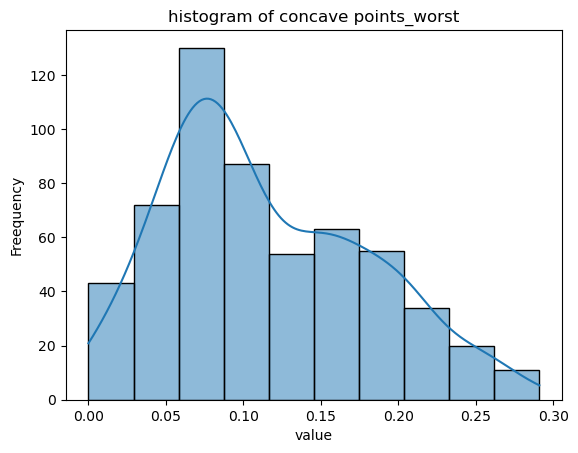

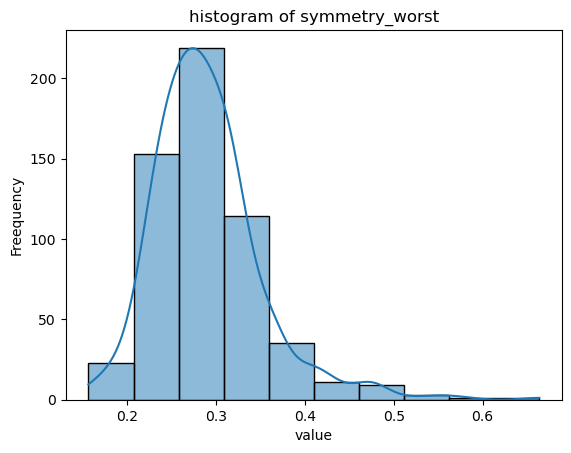

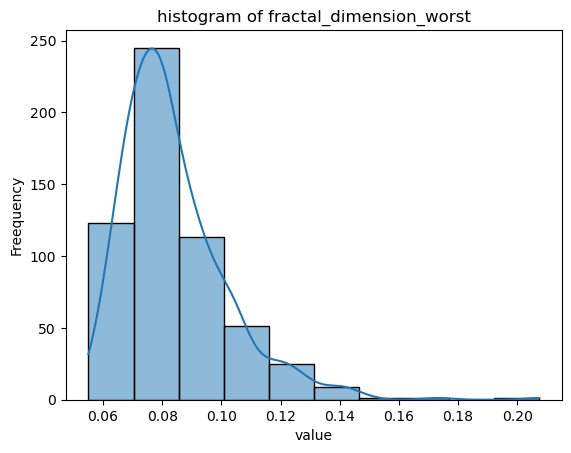

In [26]:
for i in data.select_dtypes(include=['float64','int64']):
    histplot_test(i)

### the distribution is either right skewed or near normal, in these cases standered scaler will do good

# checking duplicated values

In [29]:
data.duplicated().sum()


0

#### No Duplicate Values

# checking null values

In [32]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### No Null Values

In [34]:
data['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

## converting Diagnosis column into two categories(numerical) , Malignant becomes 1 and Benign Becomes 0

In [36]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [37]:
data['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# Keeping the original data, which will be usefull if any kind of reset is neeeded in any further steps


In [39]:
data_raw=data.copy()

#### From Now data_raw will be our Variable we will be referring

# creating two  versions of variables so that we could compare the 2 versions(with or without smote)
### the smote vesrion here is a data copy for the smote activity, it wont be directly used, a new variable will be defined after applying smote and that dataframe will be passed to build the model. Similarly for Smoothed data

In [42]:
data_for_smote=data_raw.copy()
data_without_smote=data_raw.copy()

# Using Smote for  unbalanced data
#### for the smote function to work we need two dataframes as test and train, for that we are splitting the dataframe to X and Y , y being the output, and after smote we will be rejoining the dataframes

In [44]:
X_smote = data_for_smote.drop('diagnosis', axis=1)  # All columns except Diagnosis
y_smote = data_for_smote['diagnosis']
smote=SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_smote, y_smote)
data_after_smote=pd.concat([X_train_smote, y_train_smote], axis=1)

### the variable data_after_smote will used in the follwing steps to refer smote data

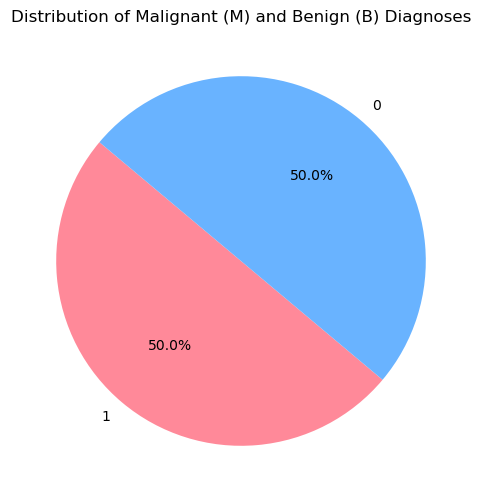

In [46]:
# Count the occurrences of 'M' and 'B' in the 'Diagnosis' column
diagnosis_counts = data_after_smote['diagnosis'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF8999', '#69B3FF'])
plt.title("Distribution of Malignant (M) and Benign (B) Diagnoses")
plt.show()

### creating two versions after smote so that we can smooth one version of it and keep the other in raw smote form

# creating a function to get the analysis, scaling and the other process in a single go, it will help us to compare multiple version of the data with multiplier classifer and will help to choose the right one by reducing manual iterations of code 
## inside the function, data splitting, data scaling, model fitting, and evaluation will be done and the evaluation report will be done 

In [49]:
models=[]
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('LR',LogisticRegression()))
models.append(('Decision Tree',DecisionTreeClassifier()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('XGboost', xgb.XGBClassifier()))
def model_build(data_inp):
    # Define features and target variable
    X = data_inp.drop('diagnosis', axis=1)  # All columns except Diagnosis
    y = data_inp['diagnosis']
    # Split the data into training and testing sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    print(f'Training data shape: {X_train.shape}')
    print(f'Testing data shape: {X_test.shape}')
    for name,model in models:
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        print(f'The classification by {name} model is as follows')
        print(classification_report(y_test,y_pred))
        fpr,tpr,threshold=roc_curve(y_test,y_pred)
        auc = roc_auc_score(y_test, y_pred)
        plt.plot([0,1],[0,1],'k--',label='Random Choice', color='Red')
        plt.plot(fpr,tpr, label=f'ROC Curve for {name} model', color='blue')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.text(.5,.2,f'AUC for the {name} model is {auc:.2f}')
        plt.title(f'ROC Curve for {name} model')
        plt.legend()
        plt.show()
        
        
    

# Part 1 : Raw data with no SMOTE

Training data shape: (398, 30)
Testing data shape: (171, 30)
The classification by AdaBoost model is as follows
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



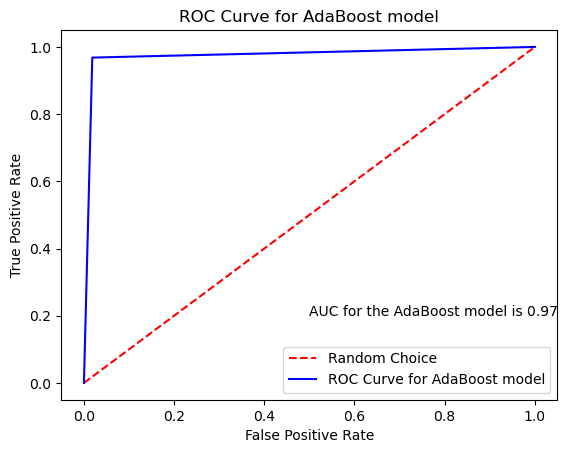

The classification by LR model is as follows
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



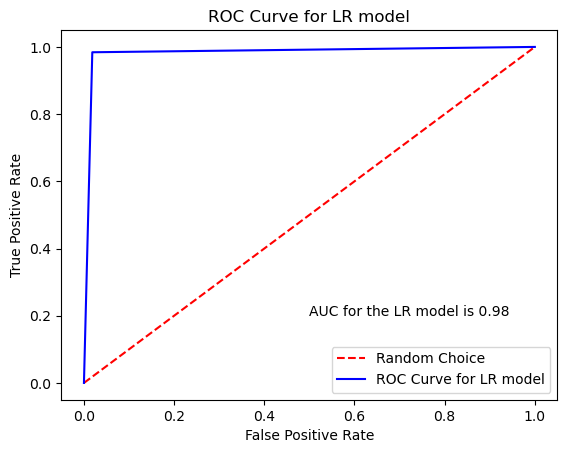

The classification by Decision Tree model is as follows
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       108
           1       0.88      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



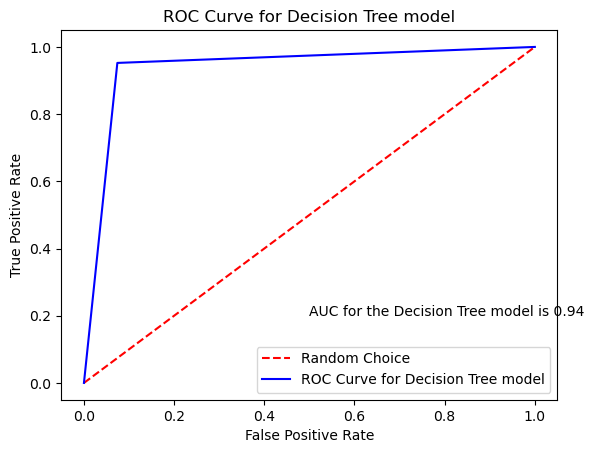

The classification by Random Forest model is as follows
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



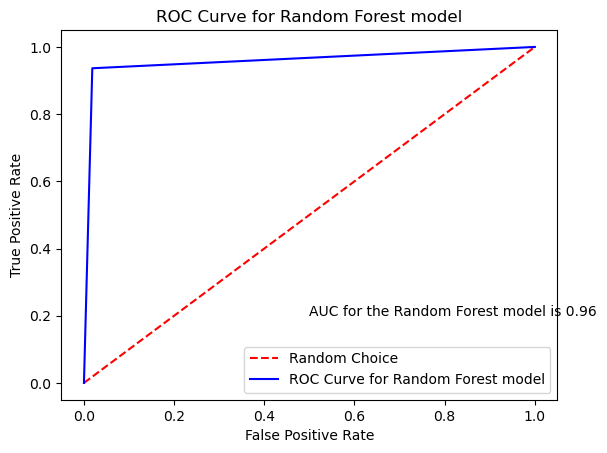

The classification by XGboost model is as follows
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



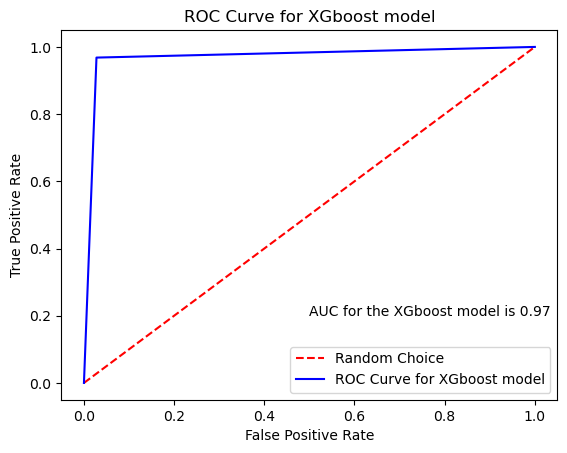

In [51]:
model_build(data_without_smote)

# Part 2: SMOTE Data

Training data shape: (499, 30)
Testing data shape: (215, 30)
The classification by AdaBoost model is as follows
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       113
           1       0.96      0.99      0.98       102

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215



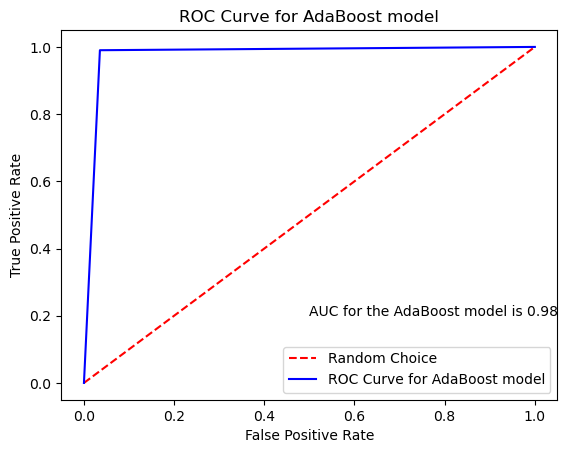

The classification by LR model is as follows
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       113
           1       0.95      0.97      0.96       102

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



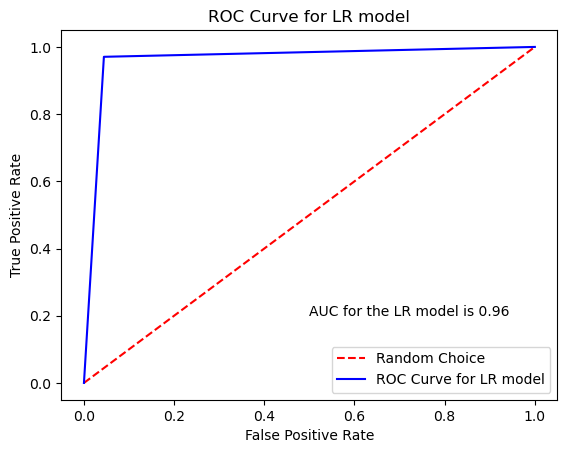

The classification by Decision Tree model is as follows
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       113
           1       0.90      0.94      0.92       102

    accuracy                           0.92       215
   macro avg       0.92      0.92      0.92       215
weighted avg       0.92      0.92      0.92       215



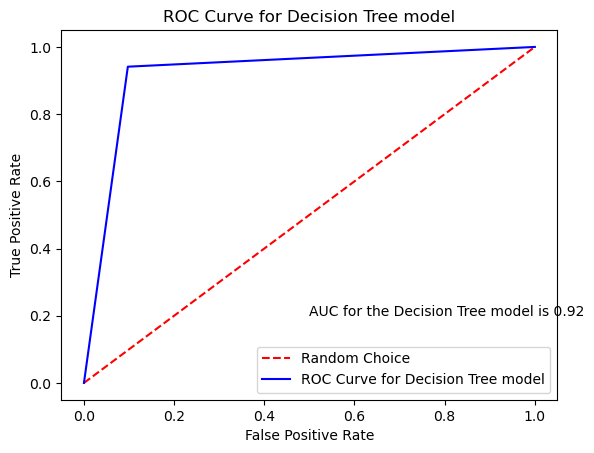

The classification by Random Forest model is as follows
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       113
           1       0.94      0.98      0.96       102

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



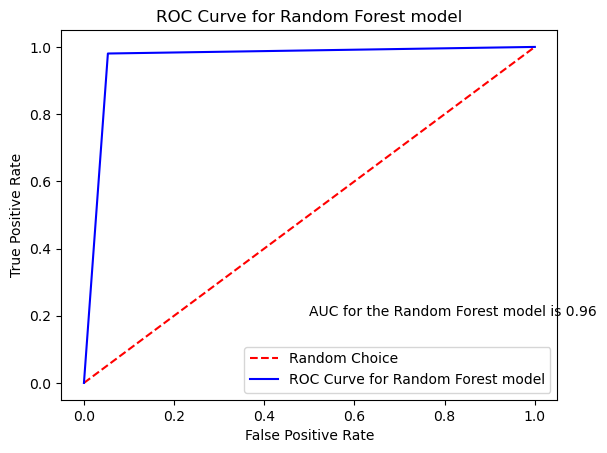

The classification by XGboost model is as follows
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       113
           1       0.97      0.99      0.98       102

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215



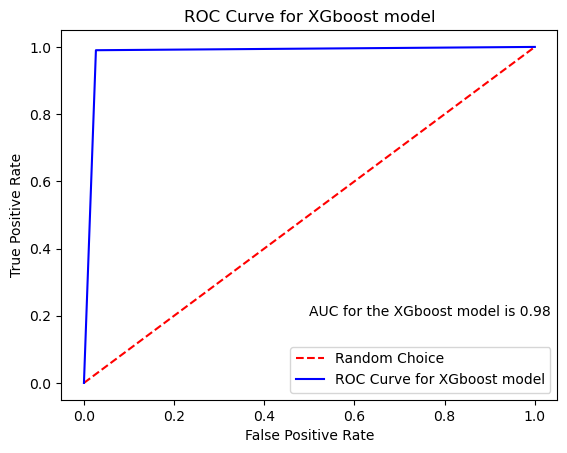

In [53]:
model_build(data_after_smote)

# analyzing the two versions, we can clearly infer that the best result is getting from Adaboost using SMOTE data
## now doing the hyperparameter tuning using GridSearchCV
### here we need a function to implement adaboost only here, therefore the other models can be discarded, so defining it as a new function which could genrate the reports of adaboost as previous, its important to note that we are not using the functon for GridSearchCV

## implementing GridSearchCV for data with SMOTE

In [80]:
# Split the data into features (X) and target (y)
X = data_after_smote.drop('diagnosis', axis=1)  # All columns except Diagnosis
y = data_after_smote['diagnosis']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for AdaBoost (expanded)
param_grid = {
    'n_estimators': [100, 200, 300],       # Added more values for boosting rounds
    'learning_rate': [1.0,1.1,1.2,1.3,1.4, 1.5,1.6]  # Added more values for learning rate
}

# Initialize the AdaBoostClassifier
ada = AdaBoostClassifier()  # Set random_state here for reproducibility

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(ada, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'learning_rate': 1.2, 'n_estimators': 100}


## implementing GridSearchCV for data without SMOTE

In [81]:
# Split the data into features (X) and target (y)
X = data_without_smote.drop('diagnosis', axis=1)  # All columns except Diagnosis
y = data_without_smote['diagnosis']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for AdaBoost (expanded)
param_grid = {
    'n_estimators': [100, 200, 300],       # Added more values for boosting rounds
    'learning_rate': [1.0,1.1,1.2,1.3,1.4, 1.5,1.6]  # Added more values for learning rate
}

# Initialize the AdaBoostClassifier
ada = AdaBoostClassifier()  # Set random_state here for reproducibility

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(ada, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'learning_rate': 1.4, 'n_estimators': 300}


### here we need a function to implement adaboost only, therefore the other models can be discarded, so defining it as a new function which could genrate the reports of adaboost as previous, its important to note that we are not using the functIon for GridSearchCV

In [85]:
def adamodel(data_inp,learning,n_est,rand):
    # Define features and target variable
    X = data_inp.drop('diagnosis', axis=1)  # All columns except Diagnosis
    y = data_inp['diagnosis']
    # Split the data into training and testing sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f'Training data shape: {X_train.shape}')
    print(f'Testing data shape: {X_test.shape}')
    model=AdaBoostClassifier(learning_rate=learning,n_estimators=n_est,random_state=rand)
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    print(f'The classification by Adaboost model is as follows')
    print(classification_report(y_test,y_pred))
    fpr,tpr,threshold=roc_curve(y_test,y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot([0,1],[0,1],'k--',label='Random Choice', color='Red')
    plt.plot(fpr,tpr, label=f'ROC Curve for Adaboost model', color='blue')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.text(.5,.2,f'AUC for the Adaboost model is {auc:.2f}')
    plt.title(f'ROC Curve for Adaboost model')
    plt.legend()
    plt.show()
        

# Initialize AdaBoostClassifier with the best hyperparameters

data_after_smote
Training data shape: (499, 30)
Testing data shape: (215, 30)
The classification by Adaboost model is as follows
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       113
           1       0.97      1.00      0.99       102

    accuracy                           0.99       215
   macro avg       0.99      0.99      0.99       215
weighted avg       0.99      0.99      0.99       215



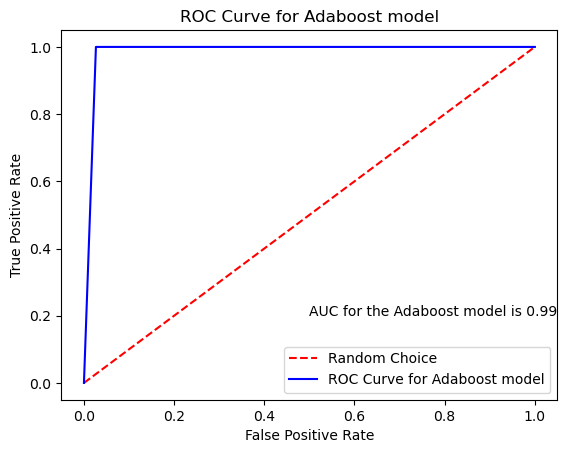

data without SMOTE
Training data shape: (398, 30)
Testing data shape: (171, 30)
The classification by Adaboost model is as follows
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       108
           1       0.95      0.98      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



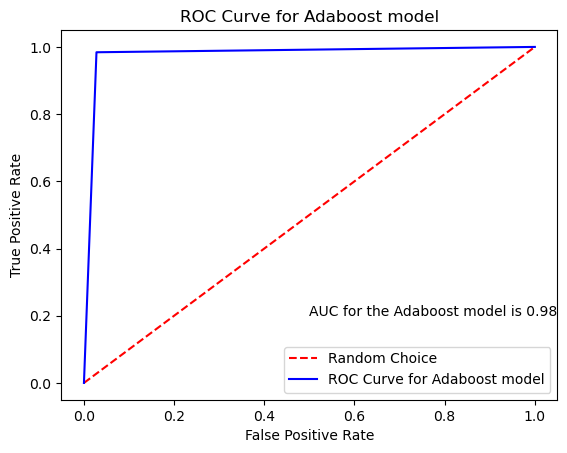

In [87]:
print('data_after_smote')
adamodel(data_after_smote,1.2,100,42)
print('data without SMOTE')
adamodel(data_without_smote,1.4,300,42)


### after hyper parameter tuning its learned that the performance of the model improved for both SMOTE and without Smote and the, now we need which are the important features

Data with SMOTE:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       113
           1       0.97      1.00      0.99       102

    accuracy                           0.99       215
   macro avg       0.99      0.99      0.99       215
weighted avg       0.99      0.99      0.99       215

Accuracy: 0.9860

Feature Importances:
                    Feature  Importance
21            texture_worst        0.08
27     concave points_worst        0.08
7       concave points_mean        0.08
13                  area_se        0.07
19     fractal_dimension_se        0.06
4           smoothness_mean        0.05
5          compactness_mean        0.05
18              symmetry_se        0.05
28           symmetry_worst        0.05
14            smoothness_se        0.04
1              texture_mean        0.04
15           compactness_se        0.04
12             perimeter_se        0.03
26          concavity_worst       

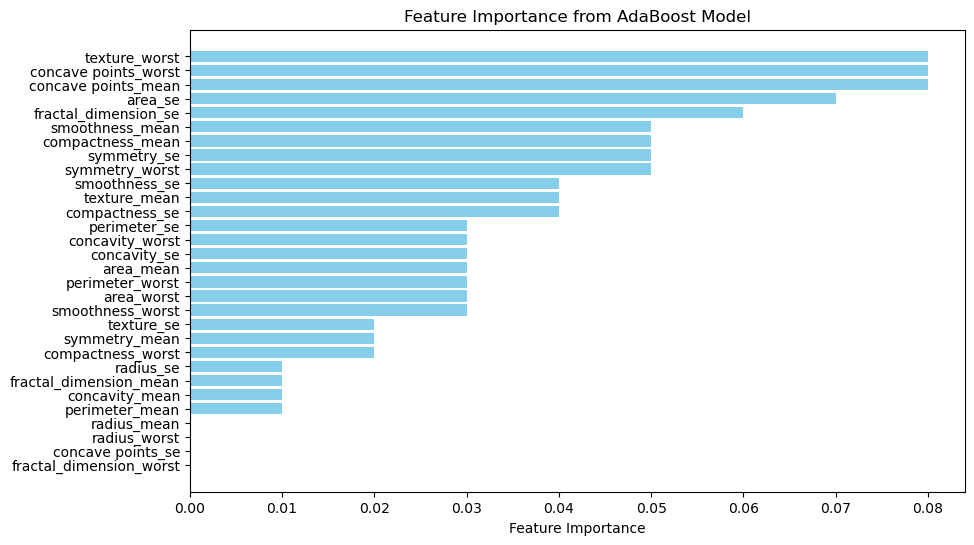


Data without SMOTE:
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       108
           1       0.95      0.98      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Accuracy: 0.9766

Feature Importances:
                    Feature  Importance
1              texture_mean    0.076667
15           compactness_se    0.066667
28           symmetry_worst    0.066667
7       concave points_mean    0.066667
21            texture_worst    0.063333
13                  area_se    0.063333
5          compactness_mean    0.060000
18              symmetry_se    0.053333
17        concave points_se    0.040000
26          concavity_worst    0.040000
23               area_worst    0.036667
4           smoothness_mean    0.036667
24         smoothness_worst    0.033333
14            smoothness_se   

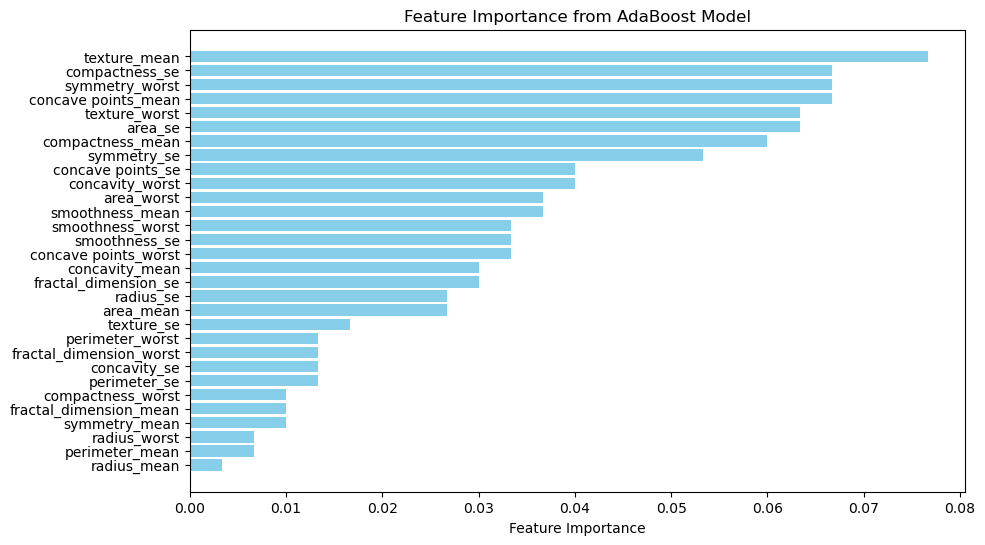

In [81]:
# Define a reusable function for the AdaBoost model
def adamodel_feature(data, learning_rate, n_estimators, random_state):
    """
    Train and evaluate an AdaBoost model with given parameters.

    Parameters:
    - data: DataFrame containing features and target variable.
    - learning_rate: Learning rate for the AdaBoost model.
    - n_estimators: Number of estimators for AdaBoost.
    - random_state: Seed for reproducibility.
    """
    # Split data into features (X) and target (y)
    X = data.drop(columns=['diagnosis'])  # Replace 'target' with the actual column name
    y = data['diagnosis']                # Replace 'target' with the actual column name

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # Initialize and train the AdaBoost model
    model = AdaBoostClassifier(
        learning_rate=learning_rate, 
        n_estimators=n_estimators, 
        random_state=random_state
    )
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    # Get and display feature importances
    feature_importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importances:")
    print(feature_importance_df)

    # Visualize feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance from AdaBoost Model')
    plt.gca().invert_yaxis()
    plt.show()

# Apply the function to the datasets
print("Data with SMOTE:")
adamodel_feature(data_after_smote, learning_rate=1.2, n_estimators=100, random_state=42)

print("\nData without SMOTE:")
adamodel_feature(data_without_smote, learning_rate=1.4, n_estimators=300, random_state=42)


## after calculating the feature importance, we chose a cutoff of .03 and the following variables are selected 
## SMOTE:
## texture_worst ,concave points_worstconcave points_mean ,area_se, fractal_dimension_se, smoothness_mean,compactness_mean,symmetry_se       ,symmetry_worst , smoothness_se  ,texture_mean, compactness_se

## Without Smote: texture_mean, compactness_se , symmetry_worst  ,concave points_mean, texture_worst ,area_se ,compactness_mean ,symmetry_se ,concave points_se, concavity_worst

## creating two variables which has the features we selected and we are going to create a new model so that we can create our streamlit app

In [93]:
# List of selected features for each dataset
selected_features_smote = [
    'texture_worst', 'concave points_worst', 'concave points_mean', 'area_se', 
    'fractal_dimension_se', 'smoothness_mean', 'compactness_mean', 'symmetry_se', 
    'symmetry_worst', 'smoothness_se', 'texture_mean', 'compactness_se','diagnosis'
]

selected_features_without_smote = [
    'texture_mean', 'compactness_se', 'symmetry_worst', 'concave points_mean', 
    'texture_worst', 'area_se', 'compactness_mean', 'symmetry_se', 'concave points_se', 
    'concavity_worst','diagnosis'
]

# Create new DataFrames with only the selected columns

# For SMOTE data
data_smote_selected = data_after_smote[selected_features_smote]

# For non-SMOTE data
data_without_smote_selected = data_without_smote[selected_features_without_smote]

# Display the new DataFrames
print("Selected features for SMOTE data:")
print(data_smote_selected.head())

print("\nSelected features for data without SMOTE:")
print(data_without_smote_selected.head())


Selected features for SMOTE data:
   texture_worst  concave points_worst  concave points_mean  area_se  \
0          17.33                0.2654              0.14710   153.40   
1          23.41                0.1860              0.07017    74.08   
2          25.53                0.2430              0.12790    94.03   
3          26.50                0.2575              0.10520    27.23   
4          16.67                0.1625              0.10430    94.44   

   fractal_dimension_se  smoothness_mean  compactness_mean  symmetry_se  \
0              0.006193          0.11840           0.27760      0.03003   
1              0.003532          0.08474           0.07864      0.01389   
2              0.004571          0.10960           0.15990      0.02250   
3              0.009208          0.14250           0.28390      0.05963   
4              0.005115          0.10030           0.13280      0.01756   

   symmetry_worst  smoothness_se  texture_mean  compactness_se  diagnosis  
0     

FOR DATA WITH SMOTE
Training data shape: (499, 12)
Testing data shape: (215, 12)
The classification by AdaBoost model is as follows
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       113
           1       0.93      0.98      0.96       102

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



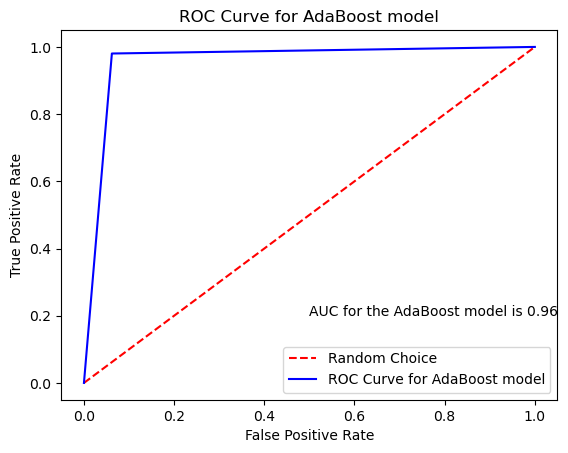

FOR DATA WITHOUT SMOTE
Training data shape: (398, 10)
Testing data shape: (171, 10)
The classification by AdaBoost model is as follows
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       108
           1       0.88      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



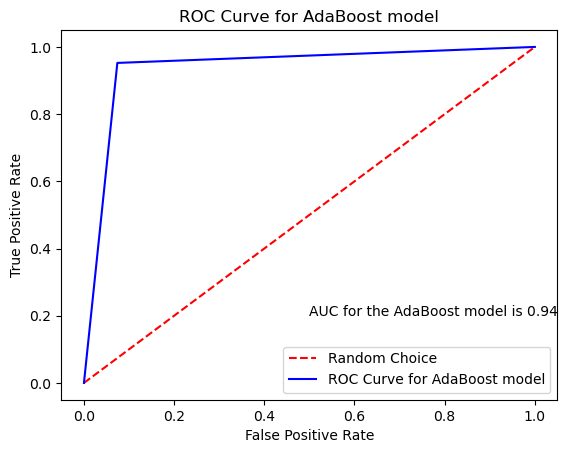

In [95]:
models=[]
models.append(('AdaBoost', AdaBoostClassifier()))
def model_build_ada(data_inp):
    # Define features and target variable
    X = data_inp.drop('diagnosis', axis=1)  # All columns except Diagnosis
    y = data_inp['diagnosis']
    # Split the data into training and testing sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    print(f'Training data shape: {X_train.shape}')
    print(f'Testing data shape: {X_test.shape}')
    for name,model in models:
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        print(f'The classification by {name} model is as follows')
        print(classification_report(y_test,y_pred))
        fpr,tpr,threshold=roc_curve(y_test,y_pred)
        auc = roc_auc_score(y_test, y_pred)
        plt.plot([0,1],[0,1],'k--',label='Random Choice', color='Red')
        plt.plot(fpr,tpr, label=f'ROC Curve for {name} model', color='blue')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.text(.5,.2,f'AUC for the {name} model is {auc:.2f}')
        plt.title(f'ROC Curve for {name} model')
        plt.legend()
        plt.show()
print('FOR DATA WITH SMOTE')        
model_build_ada(data_smote_selected)
print('FOR DATA WITHOUT SMOTE')
model_build_ada(data_without_smote_selected)
    

## We can see that the performance is good for , smote data, now doing the hyperparameter tuning for both models

## 1. Data With Smote

In [157]:
# Split the data into features (X) and target (y)
X = data_smote_selected.drop('diagnosis', axis=1)  # All columns except Diagnosis
y = data_smote_selected['diagnosis']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for AdaBoost (expanded)
param_grid = {
    'n_estimators': [50,100],       # Added more values for boosting rounds
    'learning_rate': [1.0,1.5]  # Added more values for learning rate
}

# Initialize the AdaBoostClassifier
ada = AdaBoostClassifier()  # Set random_state here for reproducibility

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(ada, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'learning_rate': 1.5, 'n_estimators': 50}


## 2. for data without smote

In [163]:
# Split the data into features (X) and target (y)
X = data_without_smote_selected.drop('diagnosis', axis=1)  # All columns except Diagnosis
y = data_without_smote_selected['diagnosis']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for AdaBoost (expanded)
param_grid = {
    'n_estimators': [ 50,100, 200],       # Added more values for boosting rounds
    'learning_rate': [1.0, 1.5]  # Added more values for learning rate
}

# Initialize the AdaBoostClassifier
ada = AdaBoostClassifier()  # Set random_state here for reproducibility

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(ada, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 200}


## Checking the model Performance with the respective hyperparameters

data_after_smote
Training data shape: (499, 12)
Testing data shape: (215, 12)
The classification by Adaboost model is as follows
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       113
           1       0.94      0.99      0.96       102

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



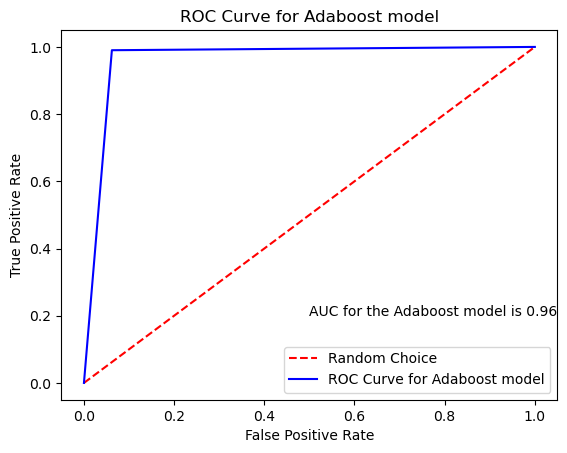

data without SMOTE
Training data shape: (398, 10)
Testing data shape: (171, 10)
The classification by Adaboost model is as follows
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       108
           1       0.89      0.92      0.91        63

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



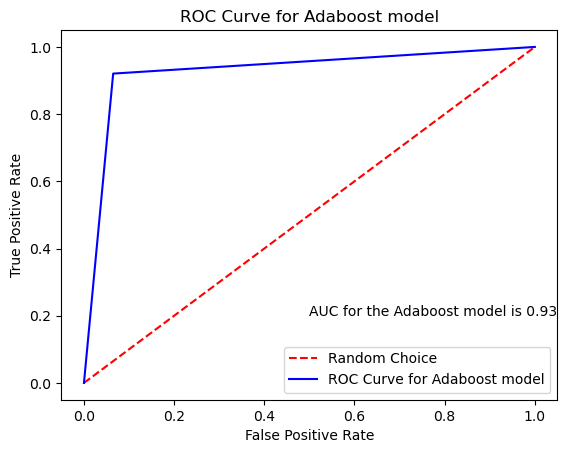

In [97]:
print('data_after_smote')
adamodel(data_smote_selected,1.5,50,42)
print('data without SMOTE')
adamodel(data_without_smote_selected,1.0,200,42)

## from this we can use our model with smote data can be used for model building and then build the streamlite, the model is with smote and having the features,
### 'texture_worst', 'concave points_worst', 'concave points_mean', 'area_se', 
### 'fractal_dimension_se', 'smoothness_mean', 'compactness_mean', 'symmetry_se', 
### 'symmetry_worst', 'smoothness_se', 'texture_mean', 'compactness_se','diagnosis'

In [113]:
X = data_smote_selected.drop('diagnosis', axis=1)  # All columns except Diagnosis
y = data_smote_selected['diagnosis']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
models = {
    "With SMOTE on Original Data": (X_train, X_test, y_train, y_test),
}
def perform_advanced_tuning(X_train, y_train):
    param_grid = {
        'n_estimators': [50],
        'learning_rate': [1.5],
        'algorithm': ['SAMME.R'],
        'estimator': [None, DecisionTreeClassifier(max_depth=1), 
                     DecisionTreeClassifier(max_depth=2)],
        'random_state': [42]
    }
    
    # GridSearchCV
    grid_search = GridSearchCV(
        estimator=AdaBoostClassifier(),
        param_grid=param_grid,
        cv=5
    )
    
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search

# Perform tuning and save models
for model_name, (X_train, X_test, y_train, y_test) in models.items():
    print(f"\nHyperparameter tuning for {model_name}...")
    best_model, search_results = perform_advanced_tuning(X_train, y_train)
    print(f"Best model for {model_name}: {best_model}")
    
    # Evaluate the best model
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy:.2%}")
    
    # Save model and metadata
    joblib.dump(best_model, f'adaboost_model_{model_name.replace(" ", "_").lower()}.pkl')
    
    metadata = {
        "X_test": X_test,
        "X_data": X,
        "feature_names": list(X.columns),
        "y_test": y_test,
        "y_pred": y_pred,
        "label_map": {1: "Malignant", 0: "Benign"},
        "accuracy": accuracy,
        "conf_matrix": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred),
        "feature_importance": best_model.feature_importances_
    }
    joblib.dump(metadata, f'data_metadata_{model_name.replace(" ", "_").lower()}.pkl')


Hyperparameter tuning for With SMOTE on Original Data...
Best model for With SMOTE on Original Data: AdaBoostClassifier(learning_rate=1.5, random_state=42)
Accuracy for With SMOTE on Original Data: 96.28%


### Saving the necessary files as pkl format